In [1]:
import pandas as pd
import numpy as np
import json
from WorkingFlowController import WorkingFlowController 
from KG import KnowledgeGraph

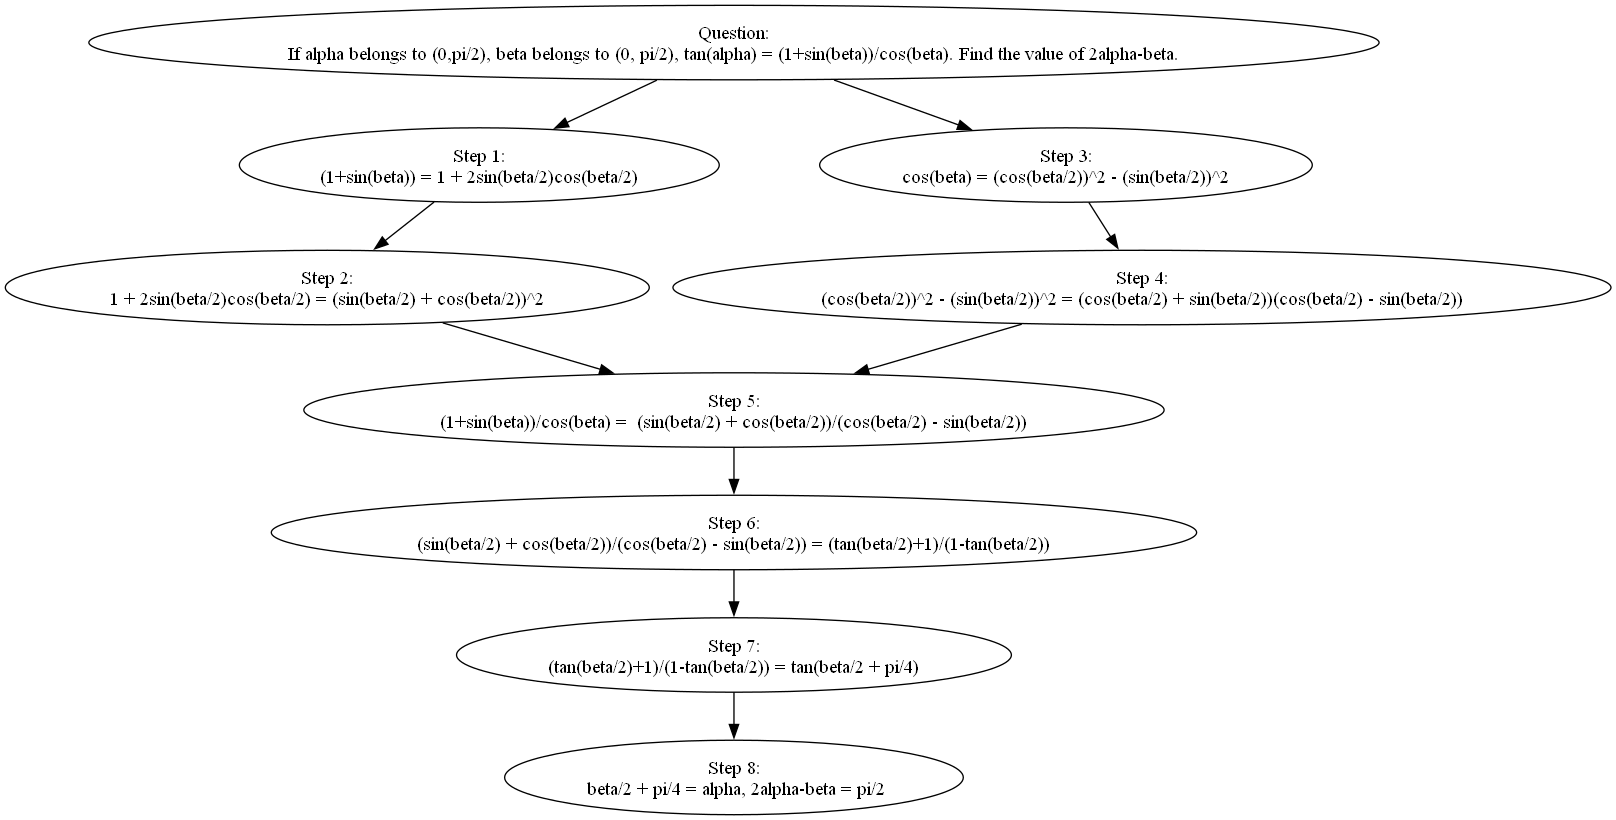

In [4]:
# Visualize question
# ATTENTION, to visualize the question, users need to install graphviz library. 
# If no need for visualization, then users can comment out the current code block, 
# it does not influence the later code running
from Visualization import solution_flow_visualization
import json
from IPython.display import Image
with open('Dataset/q2.json') as fd:
    json_data = json.load(fd)
    solution_flow_visualization(json_data, "q2")
Image("q2.png")

In [2]:
# Load knowledge graph
KG = KnowledgeGraph("KG.csv")
KG.load_KG()

In [3]:
datapath = "trimaster100"
for i in range(100):
    question = "q{0}".format(i+1)
    with open('Dataset/{0}.json'.format(question)) as fd:
        json_data = json.load(fd)
        
    controller = WorkingFlowController(breadth = 5, deepth = 4, questionjson = json_data, knowledgegraph = KG)
    controller.solve()
    controller.save_intermediate_results("{0}/{1}_answer_r1.csv".format(datapath, question))
    file_path = '{0}/{1}_answer_r1_solved.json'.format(datapath, question)

    with open(file_path, 'w') as file:
        json.dump(controller.thought_collector, file)